# **Ejercicio: Análisis y Visualización de Datos desde un CSV**

### Prof. Andrés Mena Abarca

># Estudiante: Katherine Bianco Vega

**Objetivo:**  
Leer datos de un archivo CSV, realizar un análisis exploratorio y crear diferentes gráficos para visualizar la información utilizando Pandas y Matplotlib.

In [1]:
# Importar la biblioteca pandas, que se utiliza para manipular y analizar datos estructurados.
import pandas as pd

# Definir la ruta del archivo CSV que contiene los datos.
# Aquí se especifica el nombre del archivo (puede ser relativo o absoluto).
ruta_archivo_csv = "nacimientos_defunciones.csv"

# Leer el archivo CSV en un DataFrame de pandas.
# El parámetro `delimiter=','` indica que las columnas están separadas por comas (formato CSV estándar).
df = pd.read_csv(ruta_archivo_csv, delimiter=',')

# Mostrar el contenido del DataFrame cargado.
# Esto permite visualizar los datos en forma tabular (filas y columnas).
df


,Año,Nacimientos,Defunciones
0,1950,37248,9769
1,1951,39239,9631
2,1952,42461,9902
3,1953,42817,10312
4,1954,48157,9713
...,...,...,...
67,2017,68811,23246
68,2018,68449,23806
69,2019,64274,24292
70,2020,57848,26205


## **Limpiar y procesar el DataFrame**

El DataFrame `df` tiene las siguientes columnas:

- **Año**: Esta columna contiene los años correspondientes a los registros demográficos.
- **Nacimientos**: Esta columna contiene la cantidad de nacimientos registrados en el año.
- **Defunciones**: Esta columna contiene la cantidad de defunciones registradas en el año.
- **Unnamed: x**: (si existieran columnas adicionales) Estas columnas contienen datos no deseados o nulos y deben ser eliminadas para limpiar el DataFrame.

### **Pasos para la limpieza y procesamiento:**

1. **Eliminar columnas innecesarias**: Si hay columnas como `Unnamed: x`, eliminarlas del DataFrame.
2. **Eliminar filas nulas o no válidas**: Asegurarse de que los valores en las columnas relevantes no contengan datos faltantes.
3. **Convertir los datos a tipos adecuados**: Verificar y convertir las columnas numéricas a su formato correcto (por ejemplo, `int` o `float` para los valores numéricos).
4. **Guardar el DataFrame limpio**: Exportar el resultado a un nuevo archivo CSV para análisis posterior.

In [2]:
#Para limpiar se borran cosas vacias

print('Shape: ',df.shape)
print('Columnas: ', df.columns)
print('Tipado: \n', df.dtypes)


Shape:  (72, 3)
Columnas:  Index(['Año', 'Nacimientos', 'Defunciones'], dtype='object')
Tipado: 
 Año            int64
Nacimientos    int64
Defunciones    int64
dtype: object


In [4]:
# Eliminar filas con valores nulos en cualquier columna
df.dropna(inplace=True)

df.head()
print('Shape: ' ,df.shape)

Shape:  (72, 3)


### **1\. Gráfico de líneas: Nacimientos y Defunciones por año**

### 

Este gráfico muestra la tendencia de nacimientos y defunciones a lo largo de los años.

In [5]:
import matplotlib.pyplot as plt

#El eje y defunciones
# Eje x años

df.[Año]




0     1950
1     1951
2     1952
3     1953
4     1954
      ... 
67    2017
68    2018
69    2019
70    2020
71    2021
Name: Año, Length: 72, dtype: int64

Text(0.5, 1.0, 'Tendencias Defunciones y Nacimientos \n 1950 hasta 2021')

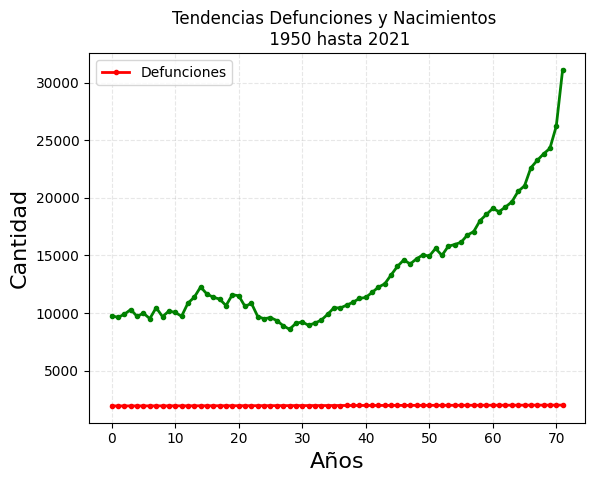

In [35]:
plt.Figure(figsize=(17,7))#ajustar tamaño

plt.grid(linestyle="--", alpha=0.3)#rejillas, cuadriculado


plt.plot(df['Defunciones'],marker='o',markersize='3',lw=2, color='green')

plt.plot(df['Año'],marker='o',markersize="3",lw=2, color='red',label='Defunciones')  #se acomoda automaticamente y y x.
#con df plot no se ocupa mapear.

plt.legend()
plt.xlabel('Años', fontsize=16)
plt.ylabel('Cantidad', fontsize=16)
plt.title(f'Tendencias Defunciones y Nacimientos \n {df['Año'].min()} hasta {df['Año'].max()}')

### **2\. Selección y Filtrado de Datos**

**Objetivo:** Practicar la selección de columnas y el filtrado de filas.

1. **Seleccionar columnas específicas:**

In [36]:
# Seleccionar las columnas de Año y Nacimientos
filtro = ['Año', 'Nacimientos']
df[filtro]

,Año,Nacimientos
0,1950,37248
1,1951,39239
2,1952,42461
3,1953,42817
4,1954,48157
...,...,...
67,2017,68811
68,2018,68449
69,2019,64274
70,2020,57848


In [40]:
# Filtrar datos desde el año 2010- a la fecha
#df_filtrado = df[df['Año']>=2010]
df_filtrado = df.loc[df['Año']>=2010]
df_filtrado


,Año,Nacimientos,Defunciones
60,2010,70922,19077
61,2011,73459,18801
62,2012,73326,19200
63,2013,70550,19646
64,2014,71793,20560
65,2015,71819,21038
66,2016,70004,22601
67,2017,68811,23246
68,2018,68449,23806
69,2019,64274,24292


Text(0.5, 1.0, 'Tendencias Defunciones y Nacimientos \n 1950 hasta 2021')

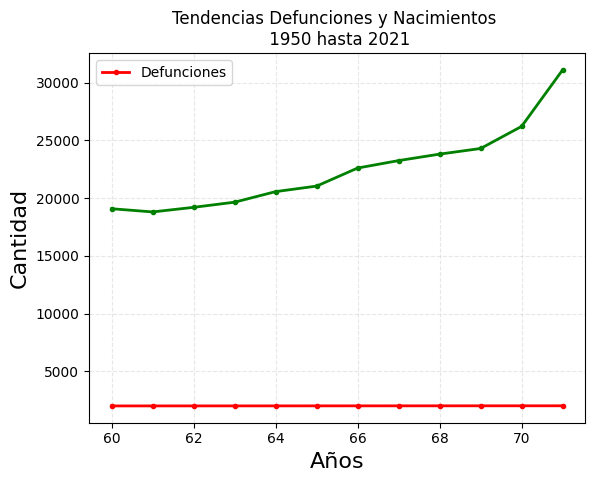

In [41]:
plt.Figure(figsize=(17,7))#ajustar tamaño

plt.grid(linestyle="--", alpha=0.3)#rejillas, cuadriculado


plt.plot(df_filtrado['Defunciones'],marker='o',markersize='3',lw=2, color='green')

plt.plot(df_filtrado['Año'],marker='o',markersize="3",lw=2, color='red',label='Defunciones')  #se acomoda automaticamente y y x.
#con df plot no se ocupa mapear.

plt.legend()
plt.xlabel('Años', fontsize=16)
plt.ylabel('Cantidad', fontsize=16)
plt.title(f'Tendencias Defunciones y Nacimientos \n {df['Año'].min()} hasta {df['Año'].max()}')

### **3\. Operaciones Básicas**

**Objetivo:** Realizar cálculos básicos utilizando las columnas del DataFrame.

1. **Calcular el total de nacimientos y defunciones:**

In [42]:
# total_nacimientos
total_nacimientos =df['Nacimientos'].sum()

# total_defunciones 
total_defunciones = df['Defunciones'].sum()

print(f'Total de nacimientos: {total_nacimientos}')
print(f'Total de funciones: {total_defunciones}')

Total de nacimientos: 4846207
Total de funciones: 975501


**2\. Añadir una nueva columna con el saldo poblacional :**

In [44]:
#Saldo Poblacional
df['Saldo_poblacional'] = df['Nacimientos'] - df['Defunciones']
df

,Año,Nacimientos,Defunciones,Saldo_poblacional
0,1950,37248,9769,27479
1,1951,39239,9631,29608
2,1952,42461,9902,32559
3,1953,42817,10312,32505
4,1954,48157,9713,38444
...,...,...,...,...
67,2017,68811,23246,45565
68,2018,68449,23806,44643
69,2019,64274,24292,39982
70,2020,57848,26205,31643


### **Creación de Gráficos con Matplotlib**

**Objetivo:** Introducir la visualización básica de datos con Matplotlib.

1. **Gráfico de líneas: Nacimientos por año**

In [ ]:
import matplotlib.pyplot as plt


### **Gráfico de barras: Comparación de nacimientos y defunciones**

In [ ]:
# Crear gráfico de barras



In [ ]:
# Filtrar datos del último año
ultimo_anio = df[df['Año'] == df['Año'].max()]

# Crear gráfico de barras



### **<mark>TAREA SEMANA 12</mark>**

**Objetivo:** Combinar la manipulación de datos con visualización.

#### **Enunciado:**

1. Filtra los datos desde el año 2000.
2. Calcula el promedio de nacimientos y defunciones desde esa fecha.
3. Crea un gráfico de líneas que compare nacimientos y defunciones desde el año 2000.

#### **Solución:**

1. **Filtrar datos desde el año 2000:**

In [ ]:
#


2. **Calcular promedios:**

In [ ]:
#

3. **Graficar:**

In [ ]:
#
